In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import Callback,EarlyStopping
from sklearn.metrics import  classification_report


In [ ]:
file_path="/content/drive/MyDrive/data/Plant Diseases Dataset/Plant Diseases Dataset/train"
train_image_path="/content/drive/MyDrive/data/Plant Diseases Dataset/Plant Diseases Dataset/train"
valid_image_path="/content/drive/MyDrive/data/Plant Diseases Dataset/Plant Diseases Dataset/valid"
test_image_path="/content/drive/MyDrive/data/test"

In [ ]:
name_class = os.listdir(file_path)
name_class

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___healthy',
 'Apple___Cedar_apple_rust',
 'Cherry_(including_sour)___healthy',
 'Grape___Black_rot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___healthy',
 'Blueberry___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Cherry_(including_sour)___Powdery_mildew',
 'Grape___healthy',
 'Grape___Esca_(Black_Measles)',
 'Peach___Bacterial_spot',
 'Potato___healthy',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Pepper,_bell___Bacterial_spot',
 'Peach___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Potato___Late_blight',
 'Raspberry___healthy',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Bacterial_spot',
 'Soybean___healthy',
 'Tomato___Early_blight',
 'Squash___Powdery_mildew',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Toma

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator , img_to_array , load_img

In [ ]:
#EXPLORATORY DATA ANALYTICS
os.listdir("/content/drive/MyDrive/data/Plant Diseases Dataset/Plant Diseases Dataset/train")

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___healthy',
 'Apple___Cedar_apple_rust',
 'Cherry_(including_sour)___healthy',
 'Grape___Black_rot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___healthy',
 'Blueberry___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Cherry_(including_sour)___Powdery_mildew',
 'Grape___healthy',
 'Grape___Esca_(Black_Measles)',
 'Peach___Bacterial_spot',
 'Potato___healthy',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Pepper,_bell___Bacterial_spot',
 'Peach___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Potato___Late_blight',
 'Raspberry___healthy',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Bacterial_spot',
 'Soybean___healthy',
 'Tomato___Early_blight',
 'Squash___Powdery_mildew',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Toma

In [ ]:
len(os.listdir("/content/drive/MyDrive/data/Plant Diseases Dataset/Plant Diseases Dataset/train"))

38

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.applications.vgg19 import VGG19, preprocess_input , decode_predictions

In [ ]:
train_datagen = ImageDataGenerator(zoom_range=0.5,shear_range=0.3, horizontal_flip=True, preprocessing_function=preprocess_input)

In [ ]:
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train = train_datagen.flow_from_directory(directory= "/content/drive/MyDrive/data/Plant Diseases Dataset/Plant Diseases Dataset/train", target_size=(256,256),batch_size=32)
val = val_datagen.flow_from_directory(directory= "/content/drive/MyDrive/data/Plant Diseases Dataset/Plant Diseases Dataset/valid", target_size=(256,256),batch_size=32)

Found 70312 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
t_img , label = train.next()

In [ ]:
t_img.shape

(32, 256, 256, 3)

In [ ]:
tf.keras.applications.EfficientNetB0

<function keras.src.applications.efficientnet.EfficientNetB0(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000, classifier_activation='softmax', **kwargs)>

In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications import EfficientNetB0
import keras

In [ ]:
effnet_model = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_shape=(256, 256, 3)
)

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
effnet_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 256, 256, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 256, 256, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 256, 256, 3)          0         ['normalization[0

In [ ]:
x = Flatten()(effnet_model.output)
x= Dense(units = 38, activation='softmax')(x)
#creating model
model= Model( effnet_model.input, x)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 256, 256, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 256, 256, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 256, 256, 3)          0         ['normalization[0][0]']   

In [ ]:
model.compile(optimizer= 'adam', loss = keras.losses.categorical_crossentropy, metrics= ['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#Early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta = 0.01, patience =3, verbose =1)

#model check point
mc= ModelCheckpoint(filepath="best_model.h5",
                    monitor='val_accuracy',
                    min_delta = 0.01,
                    patience =3, verbose =1,
                    save_best_only=True)

cb = [es,mc]

In [ ]:
his = model.fit_generator(train,
                          steps_per_epoch = 16,
                          epochs =20,
                          verbose =1,
                          callbacks = cb,
                          validation_data =val,
                          validation_steps= 16)

<ipython-input-21-571d5f02df7c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model.fit_generator(train,


Epoch 1/20
16/16 [==============================] - ETA: 0s - loss: 4.3663 - accuracy: 0.2793
Epoch 1: val_accuracy improved from -inf to 0.28320, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 419s 24s/step - loss: 4.3663 - accuracy: 0.2793 - val_loss: 4.0853 - val_accuracy: 0.2832
Epoch 2/20
16/16 [==============================] - ETA: 0s - loss: 2.3921 - accuracy: 0.5703 
Epoch 2: val_accuracy improved from 0.28320 to 0.33398, saving model to best_model.h5
16/16 [==============================] - 348s 22s/step - loss: 2.3921 - accuracy: 0.5703 - val_loss: 6.8046 - val_accuracy: 0.3340
Epoch 3/20
16/16 [==============================] - ETA: 0s - loss: 2.2333 - accuracy: 0.6289 
Epoch 3: val_accuracy improved from 0.33398 to 0.47852, saving model to best_model.h5
16/16 [==============================] - 373s 24s/step - loss: 2.2333 - accuracy: 0.6289 - val_loss: 4.9572 - val_accuracy: 0.4785
Epoch 4/20
16/16 [==============================] - ETA: 0s - loss: 1.8085 - accuracy: 0.6797 
Epoch 4: val_accuracy improved from 0.47852 to 0.49805, saving model to best_model.h5
16/16 [==============================] - 330s 21s/step - loss: 1

In [ ]:
acc = model.evaluate_generator(val)[1]
print ( f" The accuracy of your model is {acc*100} %")

<ipython-input-22-c1d43e1bc21e>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(val)[1]


 The accuracy of your model is 77.03733444213867 %


In [ ]:
h=his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

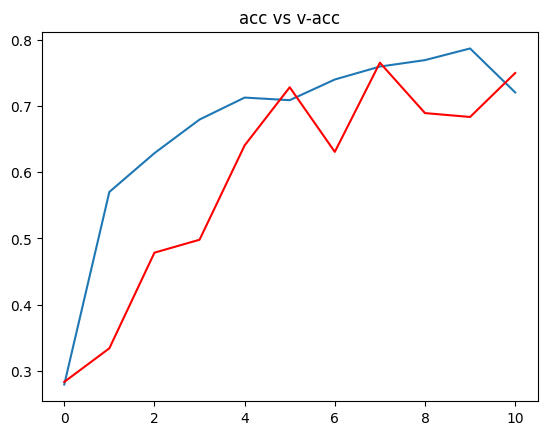

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c= "red")
plt.title("acc vs v-acc")
plt.show()

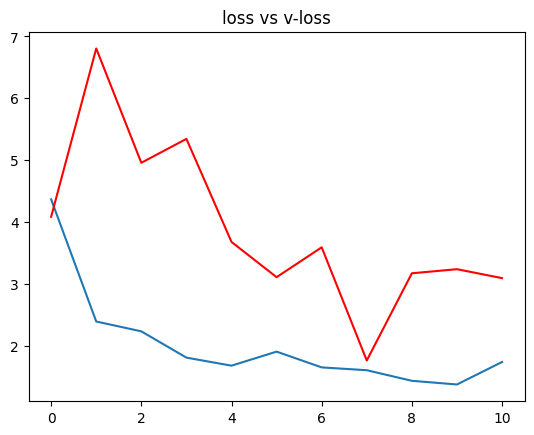

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c= "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
#load best model

from keras.models import load_model
model = load_model("/content/best_model.h5")

In [ ]:
ref = dict(zip(list(train.class_indices.values()),list(train.class_indices.keys())))
ref

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
def prediction(path):
  img = load_img(path, target_size= (256,256))
  i = img_to_array(img)
  im = preprocess_input(i)
  img = np.expand_dims(im, axis =0)
  pred =np.argmax(model.predict(img))
  print(f" the image belongs to {ref[pred]}")

In [ ]:
path = "/content/drive/MyDrive/data/test/test/PotatoEarlyBlight1.JPG"
prediction(path)

1/1 [==============================] - 2s 2s/step
 the image belongs to Potato___Late_blight


In [ ]:
path = "/content/drive/MyDrive/data/test/test/TomatoYellowCurlVirus3.JPG"
prediction(path)

1/1 [==============================] - 0s 27ms/step
 the image belongs to Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [ ]:
path = "/content/drive/MyDrive/data/test/test/PotatoHealthy1.JPG"
prediction(path)

1/1 [==============================] - 0s 35ms/step
 the image belongs to Potato___healthy


In [ ]:
path = "/content/drive/MyDrive/data/test/test/TomatoEarlyBlight3.JPG"
prediction(path)

1/1 [==============================] - 0s 25ms/step
 the image belongs to Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [ ]:
path = "/content/drive/MyDrive/data/test/test/AppleScab2.JPG"
prediction(path)

1/1 [==============================] - 0s 26ms/step
 the image belongs to Tomato___Leaf_Mold
